### 1, 이미지 불러오기/저장하기

In [1]:
from keras_preprocessing import image

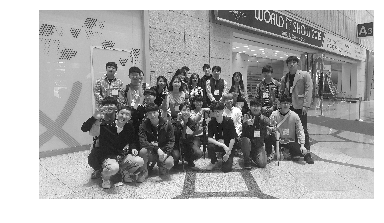

In [2]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline 

imgfile = '../images/it_show.jpg'
# load image, color
img = cv2.imread(imgfile, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.show()

### 2. 이미지 크기 변환

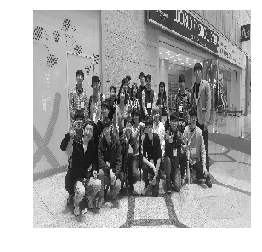

In [2]:
IMG_SIZE = 256
new_img = cv2.resize(src=gray, dsize=(IMG_SIZE, IMG_SIZE))
plt.axis("off")
plt.imshow(new_img, cmap = 'gray')

### 3. 이미지 불러오기/저장하기

In [13]:
import numpy as np
import cv2

def showImage():
    imgfile = '../images/it_show.jpg'
    # 이미지 불러오기
    img = cv2.imread(imgfile, cv2.IMREAD_COLOR)
    img = cv2.resize(src=img, dsize=(1024, 768))
    # 창조절가능 이미지 뷰    
    cv2.namedWindow('it_show', cv2.WINDOW_NORMAL)
    cv2.imshow('it_show', img)
    # wait for keyboard input, unit(ms)
    # 파라미터 0인경우 무한 대기
    inputKey = cv2.waitKey(0)
    if inputKey == 27: # esc
        cv2.destroyAllWindows()
    elif inputKey == 26: # ctrl + z
        cv2.imwrite('../images/it_show_copy.jpg',img)
        cv2.destroyAllWindows()
    else:
        cv2.destroyAllWindows()
showImage()

### 참조: matplotlib 활용 이미지 시현

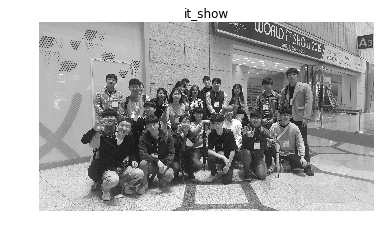

In [7]:
def showImage():
    imgfile = '../images/it_show.jpg'
    # load image, color
    img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
    
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.title('it_show')
    plt.show()
    
showImage()


# 비디오 불러오기/저장하기

### 1. 비디오 불러오기/저장하기

In [3]:
import cv2
cap = cv2.VideoCapture("../images/hkcam.avi")
#cap = cv2.VideoCapture(0)

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

## 비디오가 정상적으로 열렸는지 확인
while (cap.isOpened):
    ret, frame = cap.read()
    
    if ret:
        cv2.imshow("video", frame)
        
        # 33ms 30fps = 1000ms/30frame -> 1000/30 = 33
        k = cv2.waitKey(33)
        if k == 27:
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

### 2. 비디오 캡쳐 및 녹화

In [4]:
import datetime
import cv2

#capture = cv2.VideoCapture(0)
capture = cv2.VideoCapture("../images/image_sample.mp4")
fcc = cv2.VideoWriter_fourcc('D','I','V','X')
record = False

width = int(capture.get(3))
height = int(capture.get(4))

while (capture.isOpened):
    ret, frame = capture.read()
    if ret == False:
        break
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    key = cv2.waitKey(33)#1) & 0xFF

    if key == 27: # esc 종료
        break
    elif key == 26:   # ctrl + z
        print("캡쳐")
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) ### gray 컬러로
        cv2.imwrite("./" + str(now) + ".png", frame)
        

    elif key == 24:  # ctrl + x
        print("녹화 시작")
        record = True
        outfps = 30
        video = cv2.VideoWriter("./" + str(now) + ".avi", 
                                fcc, # 프레임 압축코드
                                outfps, 
                                (width, height))
    elif key == 3:
        print("녹화 중지") # ctrl + c
        record = False
        video.release()
    
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()


### [실습] 비디오 영상 일부를 Gray 컬러로 캡쳐하여 저장하세요

### [실습] 자유롭게 동영상을 웹캠을 통해 저장해보세요